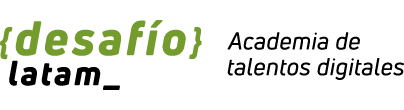

<center><h1>  <font color='green'> Solución desafío - Manipulación y transformación de datos I</font></h1></center>
<hr>

# Ejercicio 1

- Carga los datos y crea un DataFrame con cada uno de ellos.

In [ ]:
import numpy as np
import pandas as pd

df_incidents = pd.read_pickle("incidents.pkl")
df_officers = pd.read_pickle("officers.pkl")
df_subjects = pd.read_pickle("subjects.pkl")

In [ ]:
# Valores duplicados antes del cruce
print(df_incidents.duplicated().sum())
print(df_officers.duplicated().sum())
print(df_subjects.duplicated().sum())

0
0
0


- Genera una tabla que contenga la unión de las 3 tablas. hint: utiliza sufijos para para las columnas que se llaman igual usando el parámetro suffixes de pd.merge().

In [ ]:
# Cruce de las 3 tablas, indicando sufijos.
df_merged = df_incidents.\
merge(df_officers, validate = "one_to_many").\
merge(df_subjects, validate = "many_to_many", on = "case_number", suffixes = ["_officer", "_subject"])


- Verifica si hay filas duplicadas; si es así, elimínalas.

In [ ]:
# Valores duplicados después del cruce.
df_merged.duplicated().sum()


0

- ¿Cuántos sujetos de género F hay en el DataFrame resultante? hint: usa el método .value_counts() sobre la columna.

In [ ]:
df_merged['gender_subject'].value_counts()

M    368
F      9
Name: gender_subject, dtype: int64

- ¿En cuántos números de caso hay por lo menos una sospechosa que sea mujer? hint: utiliza el método unique() para obtener los valores únicos de una columna específica de un DataFrame luego de filtrar.


In [ ]:
df_merged.query("gender_subject =='F'")['case_number'].unique().shape[0]

7

- Genera una tabla pivote que muestre en las filas el género del oficial y en las columnas el género del subject. ¿Cómo interpreta los valores que muestra esta vista?

In [ ]:
# Generar la vista solicitada.
pd.pivot_table(
data = df_merged
, index = 'gender_officer'
, columns = 'gender_subject'
, values = 'case_number'
, aggfunc = 'count')

gender_subject  F    M
gender_officer        
F               2   18
M               7  350

# Ejercicio 2

- Carga los datos y crea un DataFrame con cada uno de ellos.


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("Cleaned_DS_Jobs.csv")

- Utiliza la lista de valores que serán considerados como nulos. (hint: utiliza el método replace para reemplazar los valores indicados por np.nan)


In [ ]:
# Listado de valores a reemplazar
valores_nulos = ["na", "NA", -1, "0", "-1", "null", "n/a", "N/A", "NULL"]

# Reemplazo de los valores usando un diccionario.
df_recod = df.replace(dict(zip(valores_nulos, [np.nan]*len(valores_nulos))))

- Elimina todas las filas con datos faltantes. (hint: utilice el método .dropna())


In [ ]:
df_sin_nulos = df_recod.dropna().reset_index(drop=True)

- A partir de la columna  “Salary Estimate”, genera dos columnas: Salario Estimado Mínimo y Máximo. (hint: Utiliza el método apply sobre la columna.)


In [ ]:
# Creación de la columna Min y Max Estimates Salary.
df_sin_nulos["Min Estimated Salary"] = df_sin_nulos["Salary Estimate"].apply(lambda x: [float(i.strip()) for i in x.split('-')][0])

df_sin_nulos["Max Estimated Salary"] = df_sin_nulos["Salary Estimate"].apply(lambda x: [float(i.strip()) for i in x.split('-')][1])


- Realiza la recodificación de la columna Size con los valores de la siguiente tabla: (hint: utilice reemplazo con diccionario usando el método replace sobre la columna.)


In [ ]:
# Recodificación de la columna Size.
recod_dict = {
"10000+ employees": "Mega Empresas"
,"5001 to 10000 employees": "Grandes Empresas"
,"1001 to 5000 employees": "Medianas Empresas"
,"201 to 500 employees": "Pequeñas Empresas"
,"51 to 200 employees": "Micro Empresas"
,"501 to 1000 employees": "Pequeñas Grandes Empresas"
,"Unknown": "Empresas sin Información"}

df_sin_nulos['Size'] = df_sin_nulos['Size'].replace(recod_dict)

- Finalmente, genera una tabla pivote que muestre la media del salario estimado mínimo y la media del salario estimado máximo por tamaño de empresa. (hint: utiliza pd.pivot_table para generar la vista adecuada con las columnas generadas.)

In [ ]:
pd.pivot_table(df_sin_nulos
,index = "Size"
,values = ["Min Estimated Salary", "Max Estimated Salary"]
,aggfunc = "mean")

Max Estimated Salary  Min Estimated Salary
Size                                                                 
Empresas sin Información             110.500000             73.000000
Grandes Empresas                     138.875000             92.125000
Medianas Empresas                    137.461538             93.923077
Mega Empresas                        151.111111             97.888889
Micro Empresas                       137.666667            100.666667
Pequeñas Empresas                    141.142857             93.571429
Pequeñas Grandes Empresas            146.235294            100.176471